# Métodos espectrales

Además del método de diferencias finitas, se encuentran numerosos métodos con menores problemas de estabilidad y mayor rapidez al solucionar las EDPs, uno de estos es el método espectral o método de la transformada de Fourier.

Consideremos la ecuación de onda
$$\dfrac{\partial^2 \phi}{\partial t^2} = v^2 \dfrac{\partial^2 \phi}{\partial x^2}$$
para una onda en una cuerda de largo $L$, fija en los entremos, tal que $\phi = 0$ en $x=0, L$. Consideremos la solución de prueba
$$\phi_k(x,t) = \sin \left( \dfrac{\pi kx}{L} \right) e^{i\omega t}$$

Cuando $k$ es un entero, se satisfacen las condiciones de frotera del problema, además se encuentra que
$$\omega = \dfrac{\pi vk}{L}$$

Ahora, dividamos la cuerda en $N$ intervalos iguales, acotado por $N+1$ puntos de rejilla. La posición de los puntos es
$$x_n = \dfrac{n}{N} L$$
Y la solución en estos puntos es
$$\phi_k(x_n,t) = \sin \left( \dfrac{\pi kn}{N} \right) \exp \left( i \dfrac{\pi vkt}{L} \right)$$

Como la ecuación de onda es lineal, la solución general se escribe como
$$\phi(x_n,t) = \dfrac{1}{N} \sum_{k=1}^{N-1} b_k \sin \left( \dfrac{\pi kn}{N} \right) \exp \left( i \dfrac{\pi vkt}{L} \right),$$ donde los $b_k = \alpha_k + i \beta_k$ son complejos. Tomando la parte real y evaluando en $t=0$
$$\phi(x_n,0) = \dfrac{1}{N} \sum_{k=1}^{N-1} \alpha_k \sin \left( \dfrac{\pi kn}{N} \right)$$
Esta es una transformada de Fourier por senos con coeficientes $\alpha_k$ de cualquier conjunto de puntos $\phi(x_n)$ de las condiciones iniciales. Asimismo, evaluando la primera derivada temporal en $t=0$
$$\dfrac{\partial \phi}{\partial t}(x_n,0) = -\left( \dfrac{\pi v}{L} \right) \dfrac{1}{N} \sum_{k=1}^{N-1} k \beta_k \sin \left( \dfrac{\pi kn}{N} \right),$$
que es otra transformada por senos pero con coeficientes $k\beta_k$. Por lo tanto, las condiciones iniciales nos permiten obtener la solución del problema al calcular los coeficientes $kb_k$ con FDST.

Teniendo los coeficientes, y tomando la parte real de la solución, tenemos que
$$\phi(x_n,t) = \dfrac{1}{N} \sum_{k=1}^{N-1} \left[ \alpha_k \cos\left(\dfrac{\pi vkt}{L} \right) - \beta_k \sin \left(\dfrac{\pi vkt}{L} \right) \right]\sin \left( \dfrac{\pi kn}{N} \right),$$
que es otra serie por senos. Entonces podemos evaluar la suma usando la transformada inversa por senos.

Este método es más lento que FTCS para calcular la solución en un solo intervalo de tiempo, sin embargo FTCS requiere muchos pasos para obtener la solución mientras el método espectral requiere solo uno. Este método tiene limitaciones, pues solo funciona para EDPs lineales con condiciones de contorno simples tal que $\phi = 0$ en el borde de una región simple o caja.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dcst as dc

In [2]:
# Constants

L = 1.   # Longitud de la cuerda
N = 200  # Número de sample points en x
T = 0.01  # Intervalo de tiempo
M = 20   # Pasos temporales
v = 1    # Velocidad

In [3]:
def InitialValue(x):
    if 0 <= x and x <= 2/3*L:
        return 3/20*x
    if 2/3*L < x and x <= L:
        return 3/10*(L-x)
    else:
        return 0

def InitialDerivative(x):
    return 0

In [4]:
x = np.linspace(0, L, N)

α = dc.dst(np.array([InitialValue(y) for y in x]))
β = dc.dst(np.array([InitialDerivative(y) for y in x]))

In [5]:
def Solution(t, a, b, pars):
    c = np.empty_like(a)
    v, L = pars
    c[0] = 0
    
    for k in range(1, len(c)):
        c[k] = a[k]*np.cos(np.pi*v*k*t/L) + (L/(np.pi*v*k))*b[k]*np.sin(np.pi*v*k*t/L) 
    
    return c

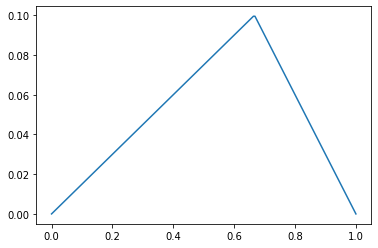

In [6]:
plt.plot(x, dc.idst(Solution(0, α, β, [v, L])))
plt.show()

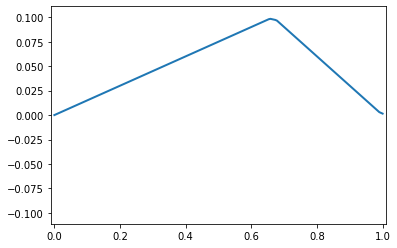

In [7]:
fig, ax = plt.subplots()
ax.set_xlim([-0.01, L + 0.01])
ax.set_ylim([-L/9, L/9])
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line, )

def animate(i):
    x = np.linspace(0, L, N)
    y = dc.idst(Solution(i*0.01, α, β, [v, L]))
    line.set_data(x, y)
    return (line, )

from matplotlib.animation import FuncAnimation
anim = FuncAnimation(fig, animate, frames=200, init_func=init, interval=100, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())
# % matplotlib notebook

## The Schrodinger equation and the spectral method

$$-\dfrac{\hbar^2}{2M} \dfrac{\partial^2 \psi}{\partial x^2} = i\hbar \dfrac{\partial \psi}{\partial t}$$

$$\psi(x_n, t) = \sum_{k=1}^{N-1} b_k \sin\left( \dfrac{\pi kn}{N} \right) \exp\left( i \dfrac{\pi^2 \hbar k^2}{2ML^2} t \right)$$

Con la condición inicial
$$\psi(x, 0) = \exp\left[ -\dfrac{(x-x_0)^2}{2\sigma^2} \right] e^{ikx}$$
con $$\psi = 0$$ en $x=0, L$

In [8]:
# Constants
from scipy.constants import hbar, m_e
h, m = hbar, m_e
L = 1e-8
x0 = L/2
σ = 1e-10
κ = 5e10
N = 1000

In [9]:
# import cmath as c

def InitialCond(x):
    if x==0 or x==L:
        return 0
    else: 
        return np.exp(-(x-x0)**2/(2*σ**2))*np.exp(1j*κ*x)

In [10]:
x = np.linspace(0, L, N)

psi0r = np.real(np.array([InitialCond(y) for y in x]))
psi0i = np.imag(np.array([InitialCond(y) for y in x]))

α = dc.dst(psi0r) 
η = dc.dst(psi0i)

In [11]:
def Coeff(t, a, n):
    c = np.empty_like(α)
    c[0] = 0
    
    for k in range(1, len(c)):
        c[k] = a[k]*np.cos((np.pi**2*h*k**2*t)/(2*m*L**2)) \
               - n[k]*np.sin((np.pi**2*h*k**2*t)/(2*m*L**2))
        
    return c

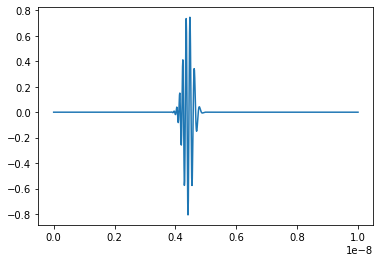

In [12]:
psitest = dc.idst(Coeff(1e-16, α, η))
plt.plot(x, psitest)
plt.show()

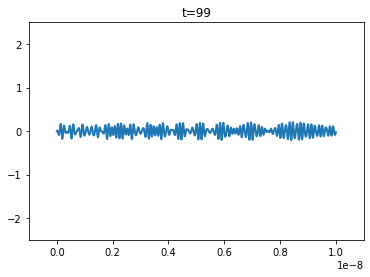

In [13]:
fig, ax = plt.subplots()
ax.set_xlim([-1e-9, L + 1e-9])
ax.set_ylim([-2.5, 2.5])
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line, )

def animate(i):
    x = np.linspace(0, L, N)
    y = dc.idst(Coeff(i*1e-16, α, η))
    ax.set_title('t={0}'.format(i))
    line.set_data(x, y)
    return (line, )

from matplotlib.animation import FuncAnimation
anim1 = FuncAnimation(fig, animate, frames=100, init_func=init, interval=100, blit=True)

# from IPython.display import HTML
HTML(anim1.to_html5_video())